# Human Activity Recognition

Belén Pulido Bravo  
Enrique Ramírez Díaz 

The aim of this project was labelling different human activities upon the data register by 5 dimensional signals: a 2-axes accelerometer and a 3-axes gyroscope, in semi-naturalistic conditions.

The set of activities recorded for labelling were:

- running
- walking
- standing
- sitting
- lying

The data provided for this assignment corresponded to 10 different people, 8 of them labelled and having a sample frequeency of 16 Hz, and 2 of them unlabelled. Each of the recordings lasted less than 20 minutes.

The main goal of this project is to infer the activity carried out by the 2 unlabelled sequences.

## Load the dataset

The data available was transferred into two different pandas dataframes, one corresponding to the training data (8 labelled sequences) and which resulted into a matrix of 141426 rows and 6 columns, and another one corresponding to the testing data (2 unlabelled sequences) which resulted into a matrix of 42188 rows and 5 columns. Moreover, the first five columns of both dataframes corresponded to each of the 5 dimensional signals explained before, and the remaining column from the training dataframe which corresponds to the labelled activity that had been developed at that moment. 

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# Change to assignment directory 
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Lab_Exercises_DASS/LAB2/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from scipy.io import loadmat,savemat
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Load data:

In [0]:
data = loadmat('HAR_database.mat')
train_data = data['database_training']
test_data = data['database_test']

Create a data frame for training data:

In [0]:
d1 = {'acc_z': train_data[0][0][0], 'acc_xy': train_data[0][0][1], 'gyro_x': train_data[0][0][2], 'gyro_y': train_data[0][0][3], 'gyro_z': train_data[0][0][4], 'label': train_data[0][1][0]}
d2 = {'acc_z': train_data[1][0][0], 'acc_xy': train_data[1][0][1], 'gyro_x': train_data[1][0][2], 'gyro_y': train_data[1][0][3], 'gyro_z': train_data[1][0][4], 'label': train_data[1][1][0]}
d3 = {'acc_z': train_data[2][0][0], 'acc_xy': train_data[2][0][1], 'gyro_x': train_data[2][0][2], 'gyro_y': train_data[2][0][3], 'gyro_z': train_data[2][0][4], 'label': train_data[2][1][0]}
d4 = {'acc_z': train_data[3][0][0], 'acc_xy': train_data[3][0][1], 'gyro_x': train_data[3][0][2], 'gyro_y': train_data[3][0][3], 'gyro_z': train_data[3][0][4], 'label': train_data[3][1][0]}
d5 = {'acc_z': train_data[4][0][0], 'acc_xy': train_data[4][0][1], 'gyro_x': train_data[4][0][2], 'gyro_y': train_data[4][0][3], 'gyro_z': train_data[4][0][4], 'label': train_data[4][1][0]}
d6 = {'acc_z': train_data[5][0][0], 'acc_xy': train_data[5][0][1], 'gyro_x': train_data[5][0][2], 'gyro_y': train_data[5][0][3], 'gyro_z': train_data[5][0][4], 'label': train_data[5][1][0]}
d7 = {'acc_z': train_data[6][0][0], 'acc_xy': train_data[6][0][1], 'gyro_x': train_data[6][0][2], 'gyro_y': train_data[6][0][3], 'gyro_z': train_data[6][0][4], 'label': train_data[6][1][0]}
d8 = {'acc_z': train_data[7][0][0], 'acc_xy': train_data[7][0][1], 'gyro_x': train_data[7][0][2], 'gyro_y': train_data[7][0][3], 'gyro_z': train_data[7][0][4], 'label': train_data[7][1][0]}

df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df3 = pd.DataFrame(d3)
df4 = pd.DataFrame(d4)
df5 = pd.DataFrame(d5)
df6 = pd.DataFrame(d6)
df7 = pd.DataFrame(d7)
df8 = pd.DataFrame(d8)

frames = [df1, df2, df3, df4, df5, df6, df7, df8]

df = pd.concat(frames, keys = [1,2,3,4,5,6,7,8])

In [0]:
df


acc_z    acc_xy    gyro_x    gyro_y    gyro_z  label
1 0      0.024173  0.594417 -0.022736  0.111962  0.060499      3
  1      0.019905  0.602472 -0.012875  0.103796  0.055157      3
  2      0.034749  0.525821 -0.020016  0.103193  0.057541      3
  3      0.059832  0.621057 -0.026841  0.104378  0.063853      3
  4      0.044743  0.653001 -0.014540  0.103560  0.066084      3
...           ...       ...       ...       ...       ...    ...
8 17605  0.577717  1.784139 -0.081926 -0.095167  0.068769      3
  17606  0.577288  1.860482 -0.080316 -0.088788  0.071567      3
  17607  0.583964  1.844136 -0.073664 -0.101740  0.081287      3
  17608  0.572480  1.783769 -0.073399 -0.089936  0.052906      3
  17609  0.582015  1.817274 -0.088948 -0.091812  0.066497      3

[141426 rows x 6 columns]

Create a data frame for tessting data:

In [0]:
d1 = {'acc_z': test_data[0][0][0], 'acc_xy': test_data[0][0][1], 'gyro_x': test_data[0][0][2], 'gyro_y': test_data[0][0][3], 'gyro_z': test_data[0][0][4]}
d2 = {'acc_z': test_data[1][0][0], 'acc_xy': test_data[1][0][1], 'gyro_x': test_data[1][0][2], 'gyro_y': test_data[1][0][3], 'gyro_z': test_data[1][0][4]}

df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)

frames = [df1, df2]

df_test = pd.concat(frames, keys = [1,2])

In [0]:
df_test

acc_z    acc_xy    gyro_x    gyro_y    gyro_z
1 0     -0.065170  0.382690 -0.213375  0.189977  0.132347
  1      0.018816  0.564156  0.059815  0.091269  0.129378
  2      0.028664  0.534412  0.109575  0.062156  0.158687
  3      0.044055  0.531722  0.077823  0.070266  0.213016
  4      0.073239  0.330309  0.042073  0.104790  0.254729
...           ...       ...       ...       ...       ...
2 22610  0.033105  0.432212 -0.091362 -0.101866  0.052534
  22611  0.025125  0.416729 -0.097420 -0.092306  0.056841
  22612 -0.004730  0.435754 -0.092469 -0.096682  0.050962
  22613 -0.016084  0.439480 -0.083564 -0.096922  0.043268
  22614  0.003370  0.440241 -0.082508 -0.103798  0.040693

[42188 rows x 5 columns]

## Obtaining information from data

The training data provided consists of 8 labelled sequences from 8 different persons who
developed different activities. There were five different activities: Running (1), Walking (2), Standing(3), Sitting(4) and Lying(5). 

Each of the training sequences had a duration inferior to 20 minutes, while testing sequences are over 20 minutes. Besides, time is not equally distributed among each activity, being standing or
sitting much more common than running for example.

As the distribution of each activity seems to be similar por each person, it makes sense to take 6 people to train our model and 2 people for evaluate it, so we can have an idea of its accuracy before we apply it to the test set.

In [0]:
#activities
val = np.sort(df.label.unique())
print(val)

[1 2 3 4 5]


In [0]:
#rows per activity
count = []

for i in val:
    count.append(df.label[df['label']==i].count())

print(count)
# A lot more data for activities 3 and 5

[4807, 29372, 41846, 40570, 24831]


In [0]:
#rows per activity per person
p_count = []

for i in range(1,9):
  p_count_i = []
  for j in val:
     p_count_i.append((df.loc[i]).label[df.loc[i,'label']==j].count())
  p_count.append(p_count_i)

#print(p_count)
display(p_count)

[[527, 3563, 5800, 5317, 2529],
 [657, 3666, 5943, 4571, 3574],
 [550, 3009, 4900, 5865, 3116],
 [607, 3529, 5813, 5257, 2620],
 [679, 4495, 4102, 4504, 3140],
 [585, 4390, 4411, 4645, 3396],
 [696, 3606, 5838, 4657, 3259],
 [506, 3114, 5039, 5754, 3197]]

In [0]:
# Duration (minuts) for each recording (train)
for i in (range(1,9)):
  print((((df.loc[i]).shape[0]))/(60*16))

18.475
19.178125
18.166666666666668
18.56875
17.625
18.153125
18.808333333333334
18.34375


In [0]:
# Duration (minuts) for each recording (test)
for i in (range(1,3)):
  print((((df_test.loc[i]).shape[0]))/(60*16))

20.388541666666665
23.557291666666668


In [0]:
#rows per person (train)
p_size = []
for i in (range(1,9)):
  p_size.append(((df.loc[i]).shape[0]))
print(p_size)

[17736, 18411, 17440, 17826, 16920, 17427, 18056, 17610]


In [0]:
#rows per person (train and test)
p_size_total = []
for i in (range(1,9)):
  p_size_total.append(((df.loc[i]).shape[0]))
for i in range(1,3):
   p_size_total.append(((df_test.loc[i]).shape[0]))
print(p_size_total)

[17736, 18411, 17440, 17826, 16920, 17427, 18056, 17610, 19573, 22615]


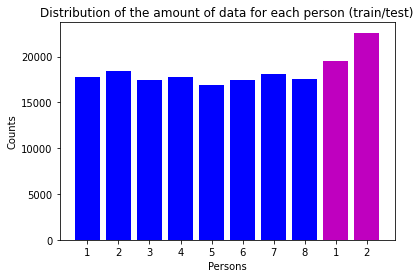

In [0]:
bars = ('1', '2', '3', '4', '5', '6', '7', '8','1','2')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
#plt.bar(y_pos, p_size,color=('m','y','g','purple','salmon','b','olive','c'))
plt.bar(y_pos, p_size_total,color=('b','b','b','b','b','b','b','b','m','m'))

# Add title and axis names
plt.title('Distribution of the amount of data for each person (train/test)')
plt.xlabel('Persons')
plt.ylabel('Counts')
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [0]:
def plot_person_activities(count):
  plt.figure()
  bars = ('Running', 'Walking', 'Standing', 'Sitting', 'Lying')
  y_pos = np.arange(len(bars))
  # Create bars and choose color
  plt.bar(y_pos, count ,color=('m','y','g','salmon','b'))
  
  # Add title and axis names
  plt.title('Distribution of the amount of data for each activity')
  plt.xlabel('Activities')
  plt.ylabel('Counts')
  
  # Create names
  plt.xticks(y_pos, bars)
  # Show graphic
  plt.show()


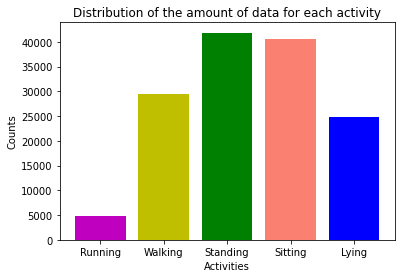

In [0]:
plot_person_activities(count)

Person 1


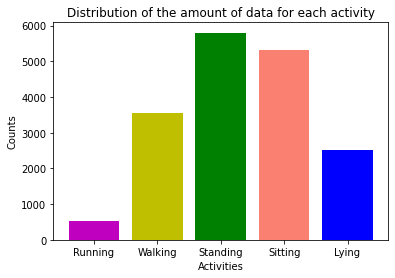

Person 2


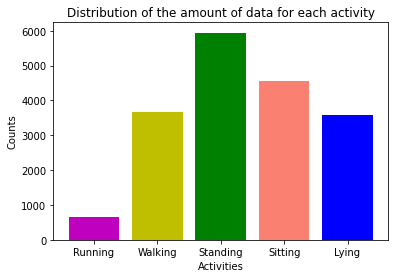

Person 3


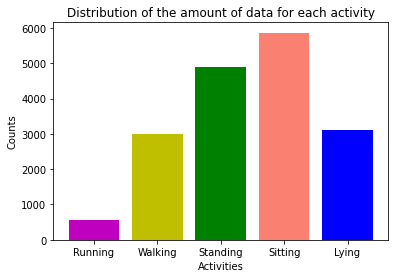

Person 4


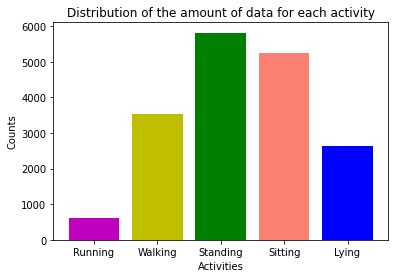

Person 5


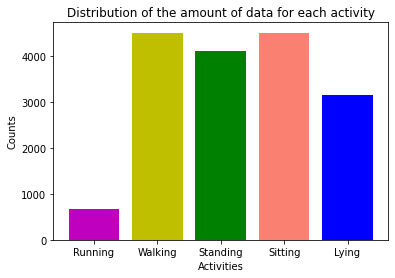

Person 6


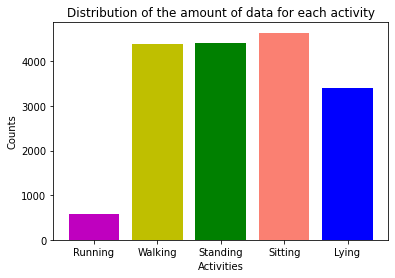

Person 7


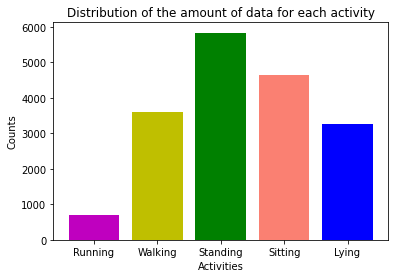

Person 8


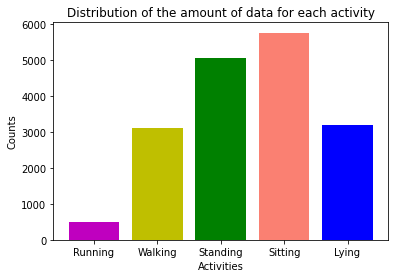

In [0]:
for i in range(8):
  print('Person',i+1)
  plot_person_activities(p_count[i])

In [0]:
#Plot for each variable
def plot_person(person):
    plt.figure()
    c = 1
    # create a plot for each column
    for col in list(person.columns):
      plt.subplot(person.shape[1], 1,c)
      plt.plot(person.loc[:,col])
      c=c+1
    plt.show()

Person 1


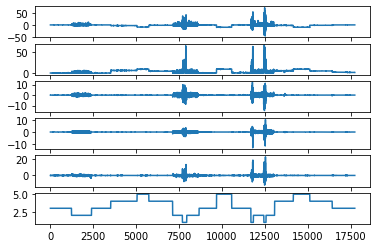

Person 2


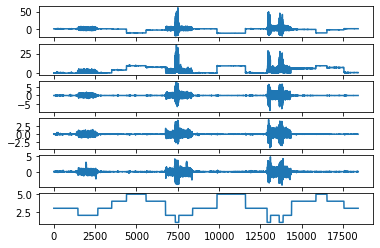

Person 3


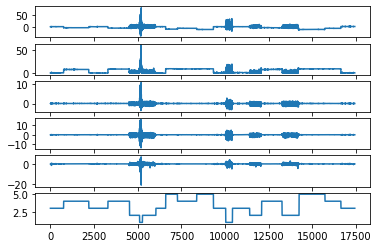

Person 4


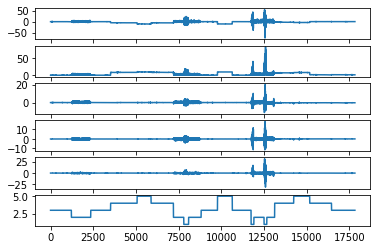

Person 5


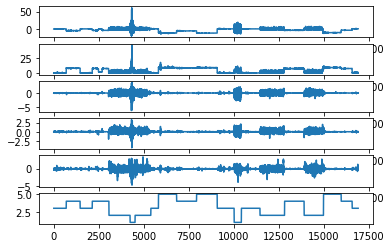

Person 6


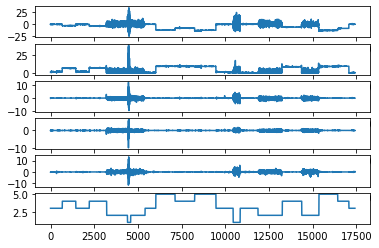

Person 7


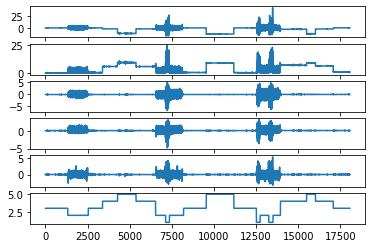

Person 8


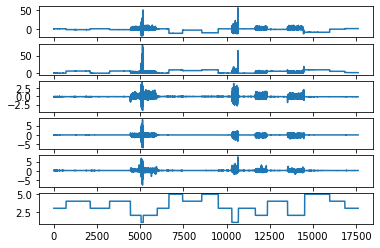

In [0]:
#Plot for each variable for each person
for i in range(1,9):
  print('Person', i)
  plot_person(df.loc[i])

## Signal Segmentation

Learn or predict from a continuous flow of data is a difficult task and can face to some tricky
issues. A reasonable solution to this would be grouping single observations and working with a bunch
of instances instead of with single ones. This is what segmentation is based on.

Thus, data had been split into windows. In our case, we have set 16 observations per window, which corresponded to 1 second of the signal, with an overlapping of 50% between them. For testing data, any overlapping had been introduced in order to assign the predicted label to the corresponding instance.

The activity assigned to each window corresponded to the most repeated value, i.e., the mode of the labels of that window data. In the end, a three dimensional array [number of windows, number of instances, number of signal components] had been obtained.

In [0]:
def windows(data,size,mode):

    if mode == 'train':
        start = 0
        while start < len(data):
            if(start+size < len(data)):
              yield int(start), int(start + size)
            
            #elif(start+size/2 <= len(data)):
            # yield int(start), int(len(data))
            start += (size / 2)

    if mode =='test':
        start = 0
        while start < len(data):
            if(start+size < len(data)):
              yield int(start), int(start + size)
            
            #elif(start+size/2 <= len(data)):
            # yield int(start), int(len(data))
            start += size

In [0]:
window_size = 16

In [0]:
from scipy import stats

#16 rows implies 1 second

def segment_signal(data,window_size = window_size):

    segments = np.empty((0,window_size,5))

    labels = np.empty((0))

    for (start, end) in windows(range(data.shape[0]), window_size,'train'):

        #if(start+window_size<data.shape[0]):
        acc_z = data["acc_z"][start:end]
        acc_xy = data["acc_xy"][start:end]
        gyro_x = data["gyro_x"][start:end]
        gyro_y = data["gyro_y"][start:end]
        gyro_z = data["gyro_z"][start:end]

        segments = np.vstack([segments,np.dstack([acc_z,acc_xy,gyro_x,gyro_y,gyro_z])])
        labels = np.append(labels,stats.mode(data["label"][start:end])[0][0])

    return segments, labels

In [0]:
def segment_signal_test(data,window_size = window_size):

    segments = np.empty((0,window_size,5))

    for (start, end) in windows(range(data.shape[0]), window_size,'test'):

        acc_z = data["acc_z"][start:end]
        acc_xy = data["acc_xy"][start:end]
        gyro_x = data["gyro_x"][start:end]
        gyro_y = data["gyro_y"][start:end]
        gyro_z = data["gyro_z"][start:end]

        segments = np.vstack([segments,np.dstack([acc_z,acc_xy,gyro_x,gyro_y,gyro_z])])

    return segments

In [0]:
# Changing categories from 1 - 5 to  0 - 4

df["label"] = df["label"] - 1

In [0]:
data, labels = segment_signal(df)

In [0]:
test_data1 = segment_signal_test(df_test.loc[1])
test_data2 = segment_signal_test(df_test.loc[2])

In [0]:
print(test_data1.shape)
print(test_data2.shape)

(1223, 16, 5)
(1413, 16, 5)


## Feature extraction



The purpose of this step was to catch the main characteristics of each segment so our classification algorithm was able to learn from representative and reliable attributes. From each window, the following features had been extracted from each original components to obtain explanatory information of the data: mean, root mean squared value, standard deviation, kurtosis, skewness and correlation between each signal component. This way, the new feature tensor obtained was a 3-dimensional array with dimensions [number of windows, number of extracted features, number of signal components].

In [0]:
import math

#root mean squared value
def rms(arr):
  square = 0
  for i in range(len(arr)):
    square += (arr[i])**2
  return (math.sqrt(square/len(arr)))
48
def extract_rmsv(data):
  rmsv = []
  for i in range(data.shape[0]):
    acc_z = []
    acc_xy = []
    gyro_x = []
    gyro_y = []
    gyro_z = []
    for j in range(data.shape[1]):
      acc_z.append(data[i][j][0])
      acc_xy.append(data[i][j][1])
      gyro_x.append(data[i][j][2])
      gyro_y.append(data[i][j][3])
      gyro_z.append(data[i][j][4])
    
    rmsv_wind = [rms(acc_z),rms(acc_xy),rms(gyro_x),rms(gyro_y),rms(gyro_z)]
    rmsv.append(rmsv_wind)
  rmsv = np.array(rmsv)
  return(rmsv)

In [0]:
def extract_features(data):

    mean = np.mean(data,axis=1).reshape(data.shape[0],1,5)

    std = np.std(data,axis=1).reshape(data.shape[0],1,5)

    kts = stats.kurtosis(data,axis=1).reshape(data.shape[0],1,5)

    sk = stats.skew(data,axis=1).reshape(data.shape[0],1,5)

    rmsv = extract_rmsv(data).reshape(data.shape[0],1,5)

    # Bucle para sacar el array de dimensiones (n_ventanas,n_correlaciones=4,n_variables=5).

    # Eliminaremos los elementos de la diagonal de la matriz de correlación puesto que son 1 por definición.

    for i in range(data.shape[0]):

        df = pd.DataFrame(data=data[i])
        corr_df = df.corr(method='pearson')
        corr_np = corr_df.to_numpy()
        cols = []

        for j in range(5):

            cols.append(corr_np[ :,j])
        
        # Eliminamos los elementos de la diagonal.

        cols[0] = np.delete(cols[0],0).reshape(4,1)
        cols[1] = np.delete(cols[1],1).reshape(4,1)
        cols[2] = np.delete(cols[2],2).reshape(4,1)
        cols[3] = np.delete(cols[3],3).reshape(4,1)
        cols[4] = np.delete(cols[4],4).reshape(4,1)

        # Obtenemos la matriz de correlación sin los elementos de la diagonal.

        corr_window = np.hstack((cols[0],cols[1],cols[2],cols[3],cols[4]))

        if i ==0:

            corr = corr_window.reshape(1,4,5)

        else:

            corr_window = corr_window.reshape(1,4,5)

            # Apilamos las matrices de correlación para cada ventana en una nueva dimensión.

            corr = np.vstack((corr,corr_window))
        
    # Obtenemos la matriz de features, de dimensión (n_ventanas,n_features,n_variables) apilando media, std, skewness, kurtosis y correlación en la primera dimensión (de las ventanas).
 
    features = np.concatenate((mean,rmsv,std,kts,sk,corr),axis=1)

    return features

In [0]:
data = extract_features(data)

n = int(data.shape[0]*0.75) #split index

test_data1 = extract_features(test_data1)

test_data2 = extract_features(test_data2)

In [0]:
print(data.shape)
print(test_data1.shape)
print(test_data2.shape)

(17677, 9, 5)
(1223, 9, 5)
(1413, 9, 5)


## CNN model

The final part of the project is the classification or recognition stage. In particular, the
classification algorithm we have implemented is a CNN, for which we used Pytorch. Specifically, the neural network is composed by a convolutional layer, a maxpool stage and three dense layers, each one followed by a non-linear activation function. The network took as inputs the windows grouped in batches. Batch size has been set to 32. Regarding convolutional layer, it was fixed to receive an input with 1 channel, using a convolving kernel of size (2,2) and giving as output an 8 channel array. Then, maxpooling carried out a max over on each (2,2) square. Following, three dense layers separated by non-linear functions performed linear operations. First, two activation functions were rectified functions and the last one was a logsoftmax, which received a final 5 dimensional array for each window and computed the probabilities for each window to belong to each class. This way, we started with a [batch_size, 1, n_features, n_components] array and we get a [batch_size, nlabels] matrix. The model was trained with data corresponding to 6 people and validated with the remaining
two. Also, during this training stage, an analysis of the cross validation loss during the epochs
was accomplished in order to control overfitting and got the optimal number of training epochs. 

In [0]:
import torch
from torch import nn
from torch import optim

In [0]:
data = torch.from_numpy(data).float()
labels = torch.from_numpy(labels).float()
test_data1 = torch.from_numpy(test_data1).float()
test_data2 = torch.from_numpy(test_data2).float()

In [0]:
train_data = data[0:n]
train_labels = labels[0:n]

valid_data = data[n:]
valid_labels = labels[n:]

In [0]:
test_data1.shape

torch.Size([1223, 9, 5])

In [0]:
def batch(data,targets,size):

    start = 0

    while start < len(data):

        if(start+size < len(data)):

          yield data[start:(start+size)], targets[start:(start+size)]

        start += size

In [0]:
def batch_test(data,size):

    start = 0

    while start < len(data):

        if(start+size <= len(data)):

          yield data[start:(start+size)]
        
        #else:

          #yield data[start: ]

        start += size

In [0]:
class cnn(nn.Module):
    def __init__(self,nlabels=5):
        super().__init__()

        self.nlabels = nlabels

        # convolutional layer
        self.conv = nn.Conv2d(in_channels=1, out_channels=8, 
                               kernel_size=2, stride=1, padding=0)
        
        # Max pool layer
        self.pool = nn.MaxPool2d(2,2)

        # Spatial dimension of the Tensor at the output of the 2nd CNN
        self.final_dim1 = int((9-1)/2)

        self.final_dim2 = int((5-1)/2)
        
        # Linear layers
        
        self.output1 = nn.Linear(8*self.final_dim1*self.final_dim2,32)

        self.output2 = nn.Linear(32,12)

        self.output3 = nn.Linear(12,self.nlabels)
    
        self.relu = nn.ReLU()
        
        self.logsoftmax = nn.LogSoftmax(dim=1) 
        

        
    def forward(self, x):

        x = self.conv(x) 
        x = self.relu(x) 

        x = self.pool(x)

        # Flatten the tensor into a vector
        x = x.view(-1, 8 * self.final_dim1 * self.final_dim2)
        # Pass the tensor through the Dense Layers
        

        x = self.output1(x)
        x = self.relu(x)

        x = self.output2(x)
        x = self.relu(x)
        
        x = self.output3(x)
        x = self.logsoftmax(x)
        
        return x


In [0]:
class cnn_extended(cnn):
    
    def __init__(self,nlabels=5,epochs=200,lr=0.001,batch_size=32):
        
        super().__init__(nlabels)

        self.epochs = epochs

        self.lr = lr

        self.batch_size = batch_size

        self.optim = optim.Adam(self.parameters(), self.lr)

        self.criterion = nn.NLLLoss()

        self.loss_during_training = []

        self.valid_loss_during_training =[]
        
    def trainloop(self,train_data,train_labels,valid_data,valid_labels):
        
        for e in range(int(self.epochs)):

            running_loss = 0.

            counter = 0

            for data,targets in batch(train_data,train_labels,self.batch_size):

                self.optim.zero_grad()

                data = data.view(self.batch_size,1,9,5)

                out = self.forward(data)

                loss = self.criterion(out,targets.long())

                running_loss += loss.item()

                loss.backward()

                self.optim.step()

                counter += 1

            self.loss_during_training.append(running_loss/counter)

            with torch.no_grad():

                running_loss = 0.

                counter = 0

                for data, targets in batch(valid_data,valid_labels,self.batch_size):

                    data = data.view(self.batch_size,1,9,5)

                    out = self.forward(data)

                    loss = self.criterion(out,targets.long())

                    running_loss += loss.item()

                    counter += 1

                self.valid_loss_during_training.append(running_loss/counter)

                print("Epoch %d. Training loss: %f, Validation loss: %f" 
                      %(e,self.loss_during_training[-1],self.valid_loss_during_training[-1]))
                
    def final_trainloop(self,train_data,train_labels):
        
        for e in range(int(self.epochs)):

            running_loss = 0.

            counter = 0

            for data,targets in batch(train_data,train_labels,self.batch_size):

                self.optim.zero_grad()

                data = data.view(self.batch_size,1,9,5)

                out = self.forward(data)

                loss = self.criterion(out,targets.long())

                running_loss += loss.item()

                loss.backward()

                self.optim.step()

                counter += 1

            self.loss_during_training.append(running_loss/counter)

            print("Epoch %d. Training loss: %f" 
                      %(e,self.loss_during_training[-1]))

    def eval_performance(self,dataset,labels):
        
        loss = 0

        accuracy = 0

        counter = 0

        with torch.no_grad():
        
            for data, targets in batch(dataset,labels,self.batch_size):

                data = data.view(self.batch_size,1,9,5)

                probs = self.forward(data)

                top_p, top_class = probs.topk(1,dim=1)

                equals = (top_class == targets.view(data.shape[0],1))

                accuracy += torch.mean(equals.type(torch.FloatTensor))

                counter += 1

            return accuracy/counter

    def predict(self,dataset):

        counter = 0

        with torch.no_grad():
        
            for data in batch_test(dataset,1):

                data = data.view(data.shape[0],1,9,5)

                probs = self.forward(data)

                top_p, top_class = probs.topk(1,dim=1)

                # top_class = torch.squeeze(top_class)

                if counter == 0:

                    predictions = top_class
                
                else:

                    predictions = torch.cat((predictions,top_class),0)

                counter += 1

            return predictions
    

In [0]:
my_CNN = cnn_extended()

my_CNN.trainloop(train_data,train_labels,valid_data,valid_labels)

Epoch 0. Training loss: 1.136004, Validation loss: 0.734839
Epoch 1. Training loss: 0.681293, Validation loss: 0.396129
Epoch 2. Training loss: 0.463484, Validation loss: 0.270262
Epoch 3. Training loss: 0.363594, Validation loss: 0.197135
Epoch 4. Training loss: 0.303765, Validation loss: 0.192894
Epoch 5. Training loss: 0.258849, Validation loss: 0.166492
Epoch 6. Training loss: 0.229986, Validation loss: 0.165563
Epoch 7. Training loss: 0.221825, Validation loss: 0.168120
Epoch 8. Training loss: 0.214074, Validation loss: 0.170090
Epoch 9. Training loss: 0.208538, Validation loss: 0.172623
Epoch 10. Training loss: 0.203403, Validation loss: 0.174366
Epoch 11. Training loss: 0.201479, Validation loss: 0.180329
Epoch 12. Training loss: 0.196238, Validation loss: 0.185248
Epoch 13. Training loss: 0.195079, Validation loss: 0.191502
Epoch 14. Training loss: 0.191694, Validation loss: 0.193886
Epoch 15. Training loss: 0.188813, Validation loss: 0.190397
Epoch 16. Training loss: 0.188518,

In [0]:
train_performance = my_CNN.eval_performance(train_data,train_labels)

valid_performance = my_CNN.eval_performance(valid_data,valid_labels)

print("Train accuracy %f" %(train_performance))
print("Validation accuracy %f" %(valid_performance))

Train accuracy 0.986489
Validation accuracy 0.967391


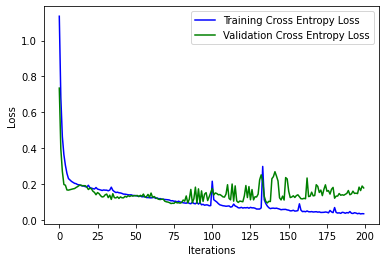

In [0]:
plt.plot(my_CNN.loss_during_training,'-b',label='Training Cross Entropy Loss')
plt.plot(my_CNN.valid_loss_during_training,'-g',label='Validation Cross Entropy Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

As we see, first epochs rapidly make the cross entropy losses decrease. Around 30 epochs, they are almost stabilized, but some small decreases and increases are shown. The key point here is that from 80 epochs, validation loss slowly increases again, while training loss keeps decreasing. This phenomenon is called overfitting: at that point, the neural network stops learning and starts memorizing the training instances, which affects its generalization ability, and the accuracy on the validation test gets worse. Therefore, network is trained again with the number of epochs that minimizes validations loss and considering the joint of training and validation sets, avoiding the overfitting part (early stopping).

Thus, 98.65% and 96.73% accuracies have been obtained for training and validation set respectively in the first case. On the other hand, the model with the optimal number of epochs yields a 95.1% of success rate on the train data and a 98.8% on the validation instances. It’s clear that the second case is a superior model and is the one we will use in the remaining tasks.

Talking about the obtained success rates,the quality of the results is very high and predictions are extremely accurate. It seems that a convolutional neural network is a right approach to this problem. Thus, a satisfactory human recognition system had been developed. However, we must mention that we were not predicting the activity of each observation itself, but the mode of the activities of 16 observations. Therefore, accuracy would be lower due to the observations in the window that do not have the mode as label. Nevertheless, when analysing the data, we saw that the same activity is performed along a large number of observations, which make sense since normally, a person performs the same activity for at least several seconds. Consequently, a small number of observations are misclassified due to this reason.

In [0]:
optim_epochs = my_CNN.valid_loss_during_training.index(min(my_CNN.valid_loss_during_training)) + 1

optim_epochs

74

Early stopping at  epochs. After that, it starts overfitting.


In [0]:
my_CNN = cnn_extended(epochs=optim_epochs)

my_CNN.final_trainloop(data,labels)

Epoch 0. Training loss: 0.929641
Epoch 1. Training loss: 0.318316
Epoch 2. Training loss: 0.259498
Epoch 3. Training loss: 0.243211
Epoch 4. Training loss: 0.240031
Epoch 5. Training loss: 0.238071
Epoch 6. Training loss: 0.230717
Epoch 7. Training loss: 0.226214
Epoch 8. Training loss: 0.221790
Epoch 9. Training loss: 0.215040
Epoch 10. Training loss: 0.213339
Epoch 11. Training loss: 0.202966
Epoch 12. Training loss: 0.183492
Epoch 13. Training loss: 0.180033
Epoch 14. Training loss: 0.179251
Epoch 15. Training loss: 0.172015
Epoch 16. Training loss: 0.170182
Epoch 17. Training loss: 0.168392
Epoch 18. Training loss: 0.163660
Epoch 19. Training loss: 0.160073
Epoch 20. Training loss: 0.157330
Epoch 21. Training loss: 0.152456
Epoch 22. Training loss: 0.149167
Epoch 23. Training loss: 0.146841
Epoch 24. Training loss: 0.145118
Epoch 25. Training loss: 0.142380
Epoch 26. Training loss: 0.138850
Epoch 27. Training loss: 0.136137
Epoch 28. Training loss: 0.133602
Epoch 29. Training loss:

In [0]:
train_performance = my_CNN.eval_performance(train_data,train_labels)

valid_performance = my_CNN.eval_performance(valid_data,valid_labels)

print("Train accuracy %f" %(train_performance))
print("Validation accuracy %f" %(valid_performance))

Train accuracy 0.951464
Validation accuracy 0.988225


In [0]:
predictions1 = my_CNN.predict(test_data1)
predictions1 = torch.squeeze(predictions1)
print(predictions1.shape)

predictions2 = my_CNN.predict(test_data2)
predictions2 = torch.squeeze(predictions2)
print(predictions2.shape)

torch.Size([1223])
torch.Size([1413])


In [0]:
print(np.unique(predictions1))
print(np.unique(predictions2))

[0 1 2 3 4]
[1 2 3 4]


Let's remember that every label in predictions makes references to each window. This means that every target describes 48 observations, so we have to repeat every component 48 times to get a category per observation in the test set. Moreover, a few test observations have been lost in the windowing, but we can attach these few ones to the last label without any significant mistake. The following code do this for both test people.

In [0]:
def get_final_pred(predictions,fin,ref,window_size = window_size):

    final_predictions = np.empty(ref,dtype=int)

    for i in range(fin):

        final_predictions[window_size*i:window_size*(i+1)] = predictions[i]

    final_predictions[window_size*(i+1): ] = predictions[-1]

    return final_predictions

In [0]:

final_predictions_1 = get_final_pred(predictions1,predictions1.shape[0],df_test.loc[1].shape[0])
final_predictions_2 = get_final_pred(predictions2,predictions2.shape[0],df_test.loc[2].shape[0])

In [0]:
#Original categories were from 1 to 5
final_predictions_1 = final_predictions_1+1
final_predictions_2 = final_predictions_2+1

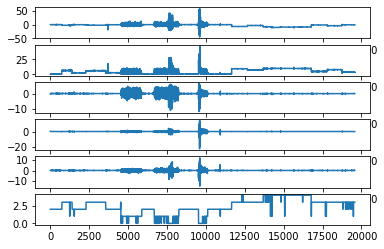

In [0]:
df_test1=df_test.loc[1]
df_test1['label']=final_predictions_1
df_test1
plot_person(df_test1)

The predicted labels for the first test person showed a similar distribution to the ones from the training set. We observed that all activities were present and that each signal component presented
peaks of activity as before. On the other hand, the second person presented a different labels
distribution, where running was not between the predicted activities. Standing was the main activity
for this person and walking, sitting and lying were in a second plane.

Text(0.5, 1.0, 'Activity Person 1')

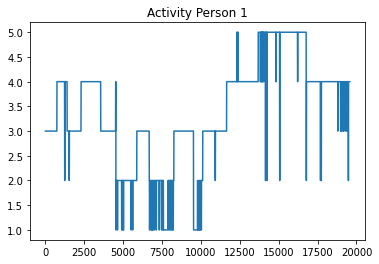

In [0]:
plt.plot(final_predictions_1)
plt.title("Activity Person 1")

In [0]:
count_t1 = []

for i in val:
    count_t1.append(sum(final_predictions_1==i))

print(count_t1)

[1104, 2576, 6288, 6693, 2912]


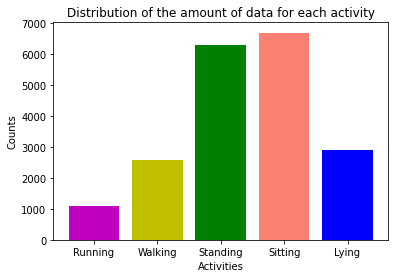

In [0]:
plot_person_activities(count_t1)

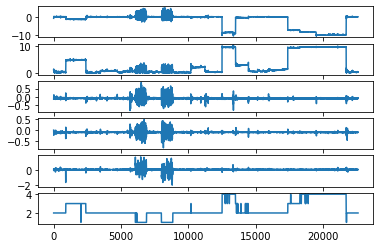

In [0]:
df_test2=df_test.loc[2]
df_test2['label']=final_predictions_2
df_test2
plot_person(df_test2)

Text(0.5, 1.0, 'Activity Person 2')

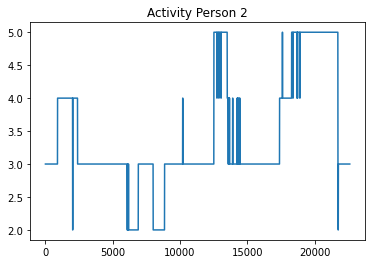

In [0]:
plt.plot(final_predictions_2)
plt.title("Activity Person 2")

In [0]:
count_t2 = []

for i in val:
    count_t2.append(sum(final_predictions_2==i))

print(count_t2)

[0, 1680, 13895, 2704, 4336]


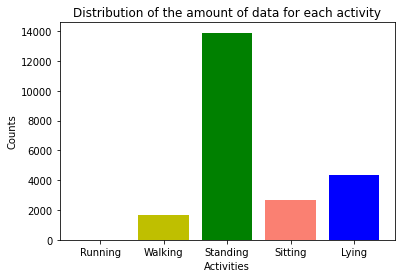

In [0]:
plot_person_activities(count_t2)

In [0]:
final_predictions_1 = final_predictions_1.reshape(1,final_predictions_1.shape[0])
final_predictions_2 = final_predictions_2.reshape(1,final_predictions_2.shape[0])

In [0]:
print(df_test.loc[1].shape[0])
print(final_predictions_1.shape)

19573
(1, 19573)


In [0]:
print(df_test.loc[2].shape[0])
print(final_predictions_2.shape)

22615
(1, 22615)


Above, we see that we got a prediction for each test observation

In [0]:
print(np.unique(final_predictions_1))
print(np.unique(final_predictions_2))

[1 2 3 4 5]
[2 3 4 5]


In [0]:
results = {'labels_test_1': final_predictions_1, 'labels_test_2': final_predictions_2}

Let's generate the mat file

In [0]:
savemat("results",results)